In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
#dropping column channel & region 
data.drop(labels=['Channel', 'Region'], axis=1, inplace=True)
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


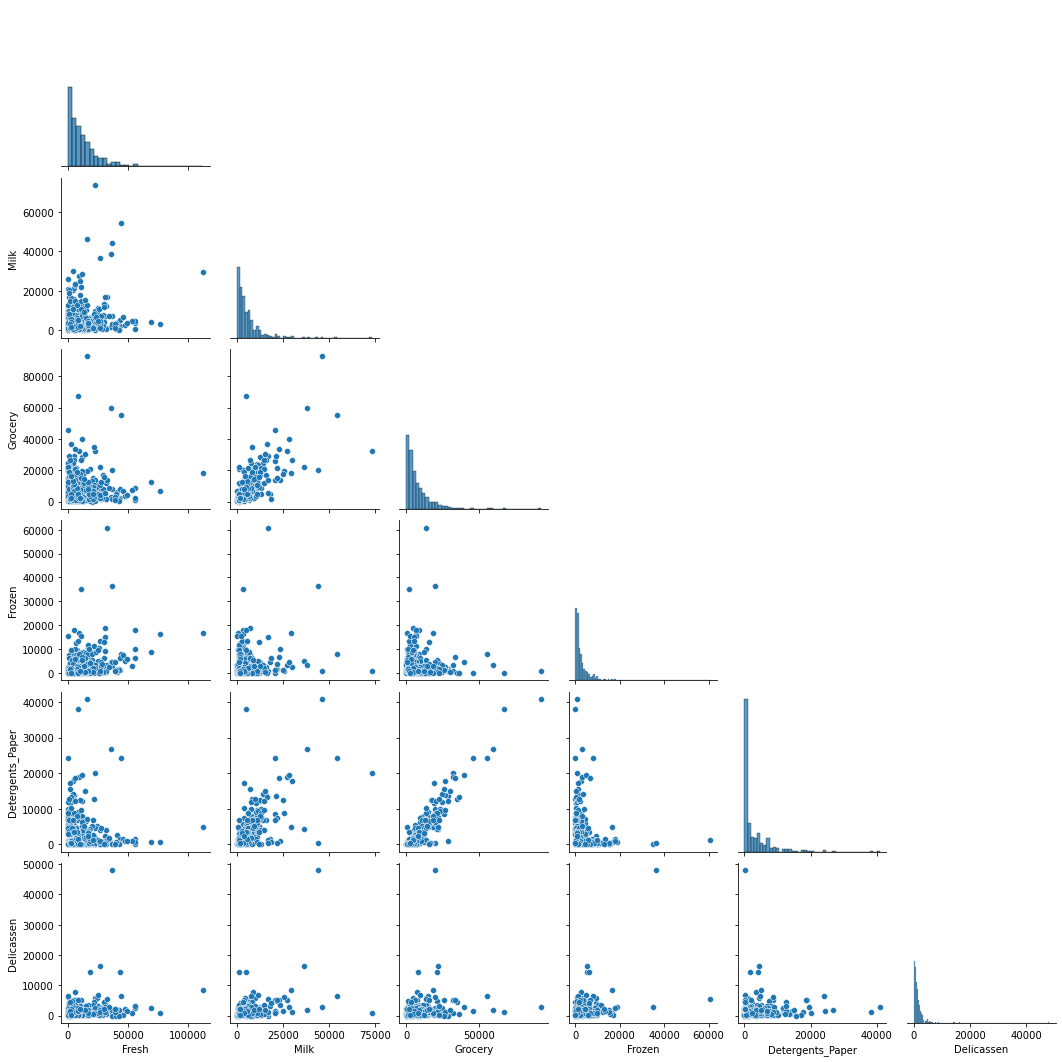

In [7]:
sns.pairplot(data, corner=True)

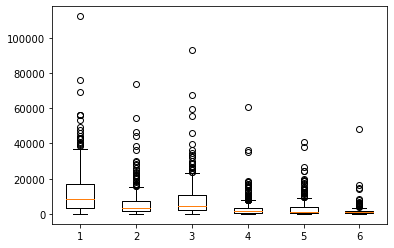

In [8]:
plt.boxplot(data)
plt.show()

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

## K-Means

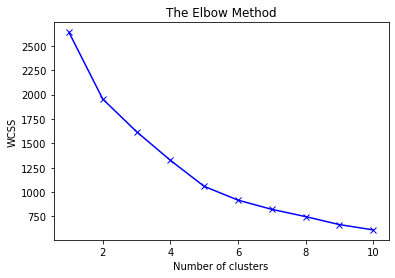

In [10]:
#using elbow method to determine number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 2)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
#fitting k-means
kmeans = KMeans(n_clusters = 5,init = 'k-means++',random_state = 8)
y_kmeans = kmeans.fit_predict(scaled_data)

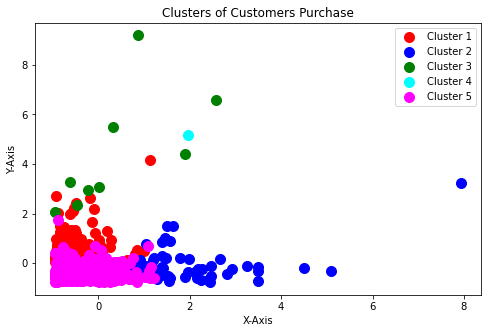

In [12]:
#visualizing the clusters
plt.figure(figsize=(8,5))
plt.scatter(scaled_data[y_kmeans == 0,0],scaled_data[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_data[y_kmeans == 1,0],scaled_data[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(scaled_data[y_kmeans == 2,0],scaled_data[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(scaled_data[y_kmeans == 3,0],scaled_data[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(scaled_data[y_kmeans == 4,0],scaled_data[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of Customers Purchase')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.legend()
plt.show()

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc_data = pca.fit_transform(scaled_data)

pc_df = pd.DataFrame(pc_data)
pc_df.columns = ['dimension 1','dimension 2']

In [14]:
data['clusters'] = y_kmeans

In [15]:
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,12669,9656,7561,214,2674,1338,4
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,4
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,4


In [16]:
pca_plot = pd.concat([pc_df,data['clusters']],axis=1)

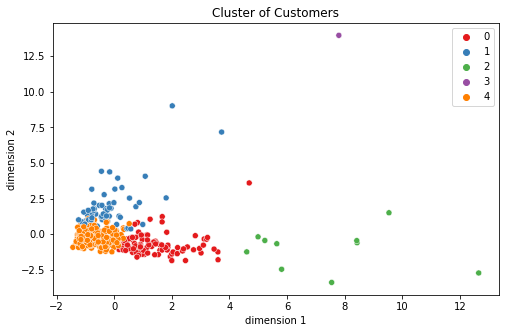

In [17]:
#visualizing the PCA clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='dimension 1', y='dimension 2', hue='clusters', 
                data=pca_plot, palette='Set1').set_title('Cluster of Customers')
plt.legend()
plt.show()

## DBSCAN

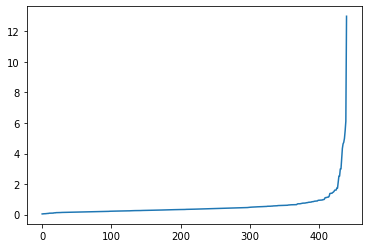

In [18]:
#determining epsilon using Euclidean distance
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=2)
distances, indices = neighbors.fit(scaled_data).kneighbors(scaled_data)

distances = distances[:,1]
distances = np.sort(distances, axis=0)
plt.plot(distances)

In [19]:
#instantiate DBSCAN
#generate an array of cluster assignments
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2,min_samples=5)
y_dbscan = dbscan.fit_predict(scaled_data)
y_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

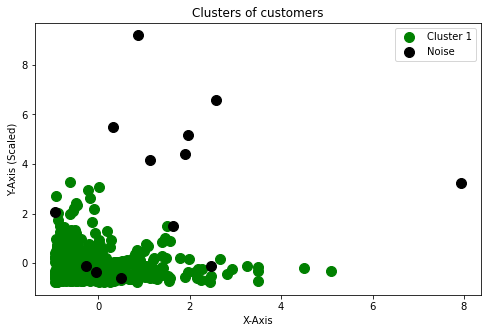

In [20]:
#visualizing the clusters
plt.figure(figsize=(8,5))
plt.scatter(scaled_data[y_dbscan == 0,0],scaled_data[y_dbscan == 0,1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(scaled_data[y_dbscan == -1,0],scaled_data[y_dbscan == -1,1], s = 100, c = 'black', label = 'Noise')

plt.title('Clusters of customers')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis (Scaled)')
plt.legend()
plt.show()

In [21]:
data['db_clusters'] = y_dbscan

In [22]:
pca_plot2 = pd.concat([pc_df,data['db_clusters']],axis=1)

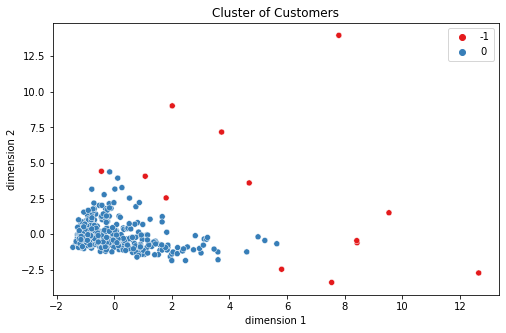

In [23]:
#visualizing the clusters using PCA
plt.figure(figsize=(8,5))
sns.scatterplot(x='dimension 1', y='dimension 2', hue='db_clusters',
                data=pca_plot2, palette='Set1').set_title('Cluster of Customers')
plt.legend()
plt.show()

In [24]:
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters,db_clusters
0,12669,9656,7561,214,2674,1338,4,0
1,7057,9810,9568,1762,3293,1776,0,0
2,6353,8808,7684,2405,3516,7844,0,0
3,13265,1196,4221,6404,507,1788,4,0
4,22615,5410,7198,3915,1777,5185,1,0
...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1,0
436,39228,1431,764,4510,93,2346,1,0
437,14531,15488,30243,437,14841,1867,0,0
438,10290,1981,2232,1038,168,2125,4,0


## Result Analysis

In [25]:
data['clusters'].value_counts()

4    269
0     97
1     63
2     10
3      1
Name: clusters, dtype: int64

In [26]:
data['db_clusters'].value_counts()

 0    427
-1     13
Name: db_clusters, dtype: int64

In [27]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_data,y_dbscan)

0.7486988127438182

In [28]:
silhouette_score(scaled_data,y_kmeans)

0.36807191214496154

In [29]:
from sklearn import metrics
score = metrics.silhouette_score(scaled_data, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.368


## Hierarchical Attempt

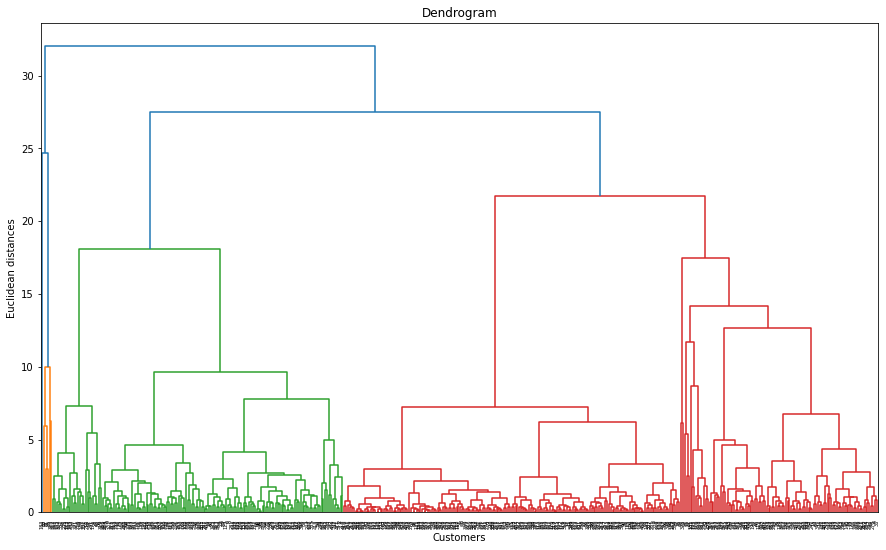

In [30]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,9))
dendogram = sch.dendrogram(sch.linkage(scaled_data,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [31]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6,affinity = 'euclidean',linkage = 'ward')
y_hc = hc.fit_predict(scaled_data)

In [32]:
silhouette_score(scaled_data,y_hc)

0.23424990872738188